In [23]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.metrics import recall_score
import numpy as np

In [3]:
X,y = make_circles(n_samples=1000, noise=0.05)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
for i in range(2, 26):
    dtree = DecisionTreeClassifier(max_leaf_nodes=i)
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    
    print(f" {i}. Pontosság: {round(accuracy_score(y_test, predictions) * 100, 2)}%")

 2. Pontosság: 59.33%
 3. Pontosság: 66.33%
 4. Pontosság: 73.67%
 5. Pontosság: 84.33%
 6. Pontosság: 84.33%
 7. Pontosság: 85.33%
 8. Pontosság: 87.0%
 9. Pontosság: 87.0%
 10. Pontosság: 89.0%
 11. Pontosság: 89.33%
 12. Pontosság: 89.33%
 13. Pontosság: 89.33%
 14. Pontosság: 90.33%
 15. Pontosság: 91.67%
 16. Pontosság: 92.33%
 17. Pontosság: 92.33%
 18. Pontosság: 92.67%
 19. Pontosság: 92.67%
 20. Pontosság: 94.0%
 21. Pontosság: 94.0%
 22. Pontosság: 95.0%
 23. Pontosság: 95.0%
 24. Pontosság: 95.0%
 25. Pontosság: 95.0%


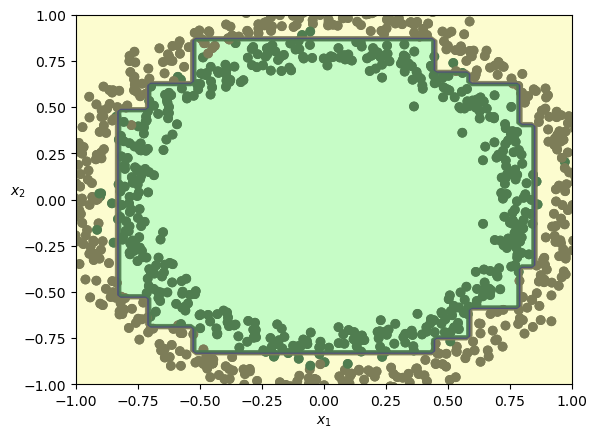

In [28]:
def plot_decision_boundary(clf, X, y, axes=[-1, 1, -1, 1], alpha=0.8, contour=True):
    X = np.array(X)
    y = np.array(y)
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    le = preprocessing.LabelEncoder()
    for i in range(len(y_pred)):
        y_pred[i] = le.fit_transform(y_pred[i])
    
    y_pred = y_pred.astype(np.float64)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])    
    
    plt.contourf(x1, x2, y_pred, alpha=0.6, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    plt.scatter(X[:,0], X[:,1], c=le.fit_transform(y), cmap = custom_cmap2)
    plt.scatter(X[:,0], X[:,1], c=le.fit_transform(y), cmap = custom_cmap2)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
    
plot_decision_boundary(dtree,X,y)

In [25]:
print(f" {i}. Pontosság: {round(accuracy_score(y_test, predictions) * 100, 2)}%")
print(f" {i}. visszahívás {round(recall_score(y_test, predictions) * 100, 2)}%")

 25. Pontosság: 95.0%
 25. visszahívás 92.67%


A sklearn make_circles létrehoztam 2 1000 mintás osztályt ,ezeket a train_test_splittel szétszedtem tanitó és test halmazokra
ezután megnéztem hogy hány levélel legnagyobb a pontosság és megjelenitettem egy diagrammon a határokkal,majd a végén megjelenitettem a pontosságot és a visszahivás mutatókat.